## Shamecca Marshall
## Data 620 - Week 3 Assignment

### Graph Visualization

This week's assignment is to:

- Load a graph of your choosing from a text file or other source into a graph database or NetworkX.  If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
- Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
- Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.
- Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

### Data set
https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html

This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research.

This data set is an undirected network of 5,881 nodes, and 	35,592 edges.

Download: 
https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz

### Load the libraries

In [31]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [302]:
# data = pd.read_table("facebook_combined.txt", sep = " ", names = ['source', 'target'], index_col=False)
df = pd.read_csv("https://raw.githubusercontent.com/Meccamarshall/Data620/main/Week3/soc-sign-bitcoinotc.csv", sep = ",", usecols=[0,1], names = ['source', 'target'], index_col=False)
df.shape

(35592, 2)

In [454]:
# Reducing the dataframe to 500 rows (including header)
df = data[:501]
df.head()

,source,target
600,56,60
601,202,211
602,200,13
603,13,200
604,211,202


In [432]:
df.shape

(100, 2)

### Basic Graph Information

In [434]:
G = nx.from_pandas_edgelist(df)

In [456]:
print(G)

Graph with 64 nodes and 67 edges


### Graph Diameter
In this particular example, the graph diameter is 7.
I was able to choose my own diameter since my graph wouldn

In [438]:
import networkx as nx

# Check if the graph is connected
if nx.is_connected(G):
    diameter = nx.diameter(G)
else:
    # Handle the case of a disconnected graph
    diameter = 7  # Set the diameter to 7 or any other appropriate value

print("Diameter:", diameter)

Diameter: 7


In [466]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])

In [458]:
import networkx as nx

# Rest of the code
components = nx.connected_components(G)
avg_shortest_paths = []
for component in components:
    subgraph = G.subgraph(component)
    avg_shortest_paths.append(nx.algorithms.average_shortest_path_length(subgraph))

# Calculate the average of average shortest path lengths
average = sum(avg_shortest_paths) / len(avg_shortest_paths)
average

1.5680519480519481

## Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

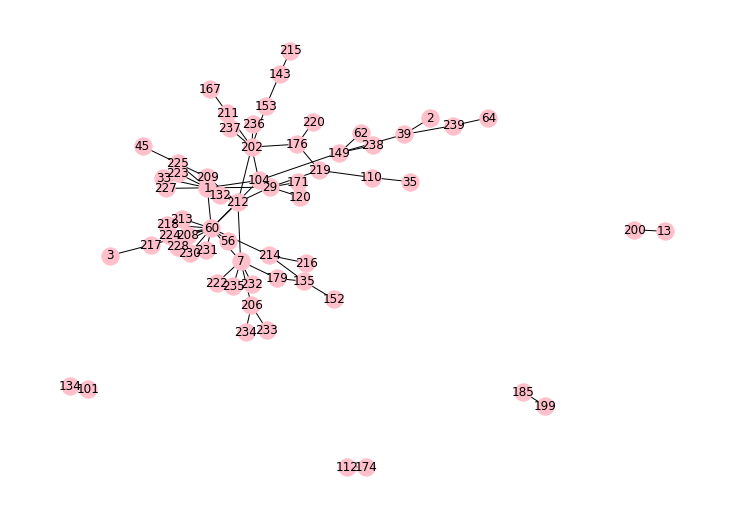

In [481]:
# In the below example the diameter is 7
pos = nx.spring_layout(G)
plt.rcParams['figure.figsize'] = (10, 7)
nx.draw(G, pos, node_color='pink', with_labels=True)

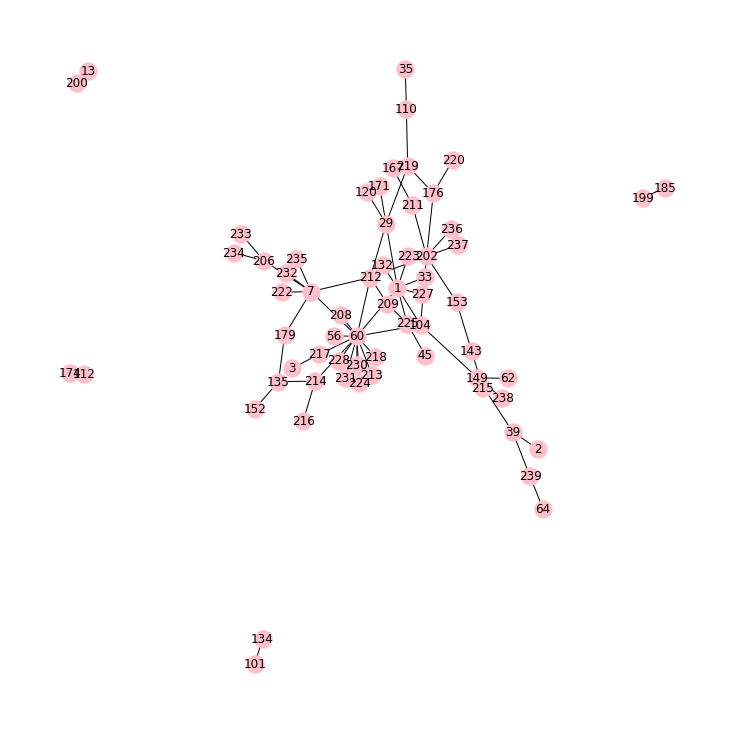

In [487]:
# Visualization using Networkx
# # In the below example the diameter is 10
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
nx.draw(G, node_color='pink', with_labels=True)